## Example: receptive fields of deep CNNs

Compute the receptive fields of neurons inside CNNs.

Receptive fields $\mathcal R^l = [R_n^l |  n \text{ is a neuron in layer } l]$ are reported as images that have the same size of the input. 

The value of $R^l_n[i, j] \in [0, 1]$ corresponds to how much pixel (i, j), in an input image - i.e. $x[:, i, j]$ - would contribute to the output of neuron $n$, which lives in layer $l$.

In [1]:
import matplotlib.pyplot as plt
import torchvision
from torchvision.models.feature_extraction import get_graph_node_names

from receptivefield import *
from models import *
from utils import *

### VGG receptive fields

In [2]:
# Initialize model
net = VGG('VGG11', num_ch=3, num_classes=10, batch_norm=1, pooling='max')
# Enumerate the network operations
nodes, _ = get_graph_node_names(net)
print('All nodes are: ', nodes)
# select layer(s)
nodes = [n for n in nodes if n in ['features.6', 'features.10']]
print('Selected nodes:', nodes)

All nodes are:  ['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'features.13', 'features.14', 'features.15', 'features.16', 'features.17', 'features.18', 'features.19', 'features.20', 'features.21', 'features.22', 'features.23', 'features.24', 'features.25', 'features.26', 'features.27', 'features.28', 'features.29', 'size', 'view', 'classifier']
Selected nodes: ['features.6', 'features.10']


In [3]:
# Compute receptive field of the remaining part
rf = receptive_field(net, layers=nodes)

We plot here the receptive fields of neurons at layer 10.

The plot follows the structure of the activation maps, that are 8x8 in this layer - i.e. the top right receptive field correspond to the top right pixel in the activation map and so on...

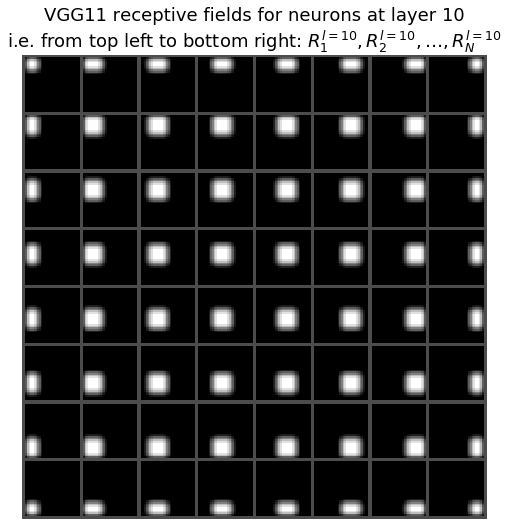

In [4]:
plt.figure(figsize=(7.5, 7.5))
layer = 'features.10'
n = rf[layer].shape[-1]
g = torchvision.utils.make_grid(rf[layer].reshape(-1, 1, n, n), nrow=8, pad_value=.3)
plt.imshow(g.permute(1, 2, 0))
plt.title('VGG11 receptive fields for neurons at layer 10\ni.e. from top left to bottom right: $R_1^{l=10}, R_2^{l=10}, \dots, R_N^{l=10}$', fontsize=18)
plt.axis('off')
plt.tight_layout(0)

### Same for ResNet18

In [5]:
# Initialize model
net = ResNet18()
# Enumerate the network operations
nodes, _ = get_graph_node_names(net)
print('All nodes are: ', nodes)
# select layer(s)
nodes = [n for n in nodes if n in ['layer3.0.conv1']]
print('Selected nodes:', nodes)

All nodes are:  ['x', 'conv1', 'bn1', 'relu', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.add', 'layer1.0.relu_1', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.add', 'layer1.1.relu_1', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.shortcut.0', 'layer2.0.shortcut.1', 'layer2.0.add', 'layer2.0.relu_1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.add', 'layer2.1.relu_1', 'layer3.0.conv1', 'layer3.0.bn1', 'layer3.0.relu', 'layer3.0.conv2', 'layer3.0.bn2', 'layer3.0.shortcut.0', 'layer3.0.shortcut.1', 'layer3.0.add', 'layer3.0.relu_1', 'layer3.1.conv1', 'layer3.1.bn1', 'layer3.1.relu', 'layer3.1.conv2', 'layer3.1.bn2', 'layer3.1.add', 'layer3.1.relu_1', 'layer4.0.conv1', 'layer4.0.bn1', 'layer4.0.relu', 'layer4.0.conv2', 'layer4.0.bn2', 'layer4.0.shortcut.0', 'layer4.0.shortcut.1', 'layer4.0.a

In [6]:
# Compute receptive field of the remaining part
rf = receptive_field(net, layers=nodes)

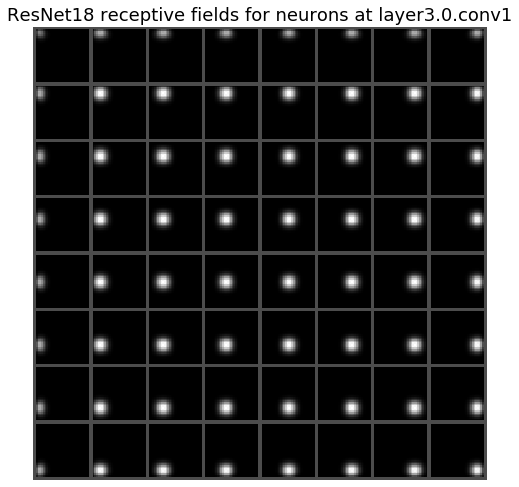

In [7]:
plt.figure(figsize=(7.5, 7.5))
l = nodes[0]
n = rf[l].shape[-1]
g = torchvision.utils.make_grid(rf[l].reshape(-1, 1, n, n), nrow=8, pad_value=.3)
plt.imshow(g.permute(1, 2, 0))
plt.title(f'ResNet18 receptive fields for neurons at {l}', fontsize=18)
plt.axis('off')
plt.tight_layout(0)